In [1]:
#DATA SCRAPER
import requests
from bs4 import BeautifulSoup

def geturl(league: str, player_name: str, team: str, time_duration: str):
    """Get the URL for StatMuse"""
    return f"https://www.statmuse.com/{league}/ask/{player_name}-vs-{team}-{time_duration}"

def scrape_statmuse(url):
    """
    Scrapes data from a StatMuse page and returns it as a nested list.

    Args:
        url (str): The URL of the StatMuse page to scrape.

    Returns:
        list: A nested list containing the scraped data.
    """
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the table
    table = soup.find('table')
    if not table:
        print("No table found on the page.")
        return []

    # Extract headers
    headers = [header.get_text(strip=True) for header in table.find_all('th')]

    # Extract rows
    rows = table.find_all('tr')
    data = [headers]

    for row in rows[1:]:
        cells = row.find_all('td')
        row_data = [cell.get_text(strip=True) for cell in cells]

        # Skip empty rows and totals
        if any(cell.strip() for cell in row_data) and 'Total' not in row_data:
            data.append(row_data)

    return data


# Example usage
nba_url = geturl("nba", "lebron-james", "mavs", "last-5-regular-games")
nba_data = scrape_statmuse(nba_url)

nfl_url = geturl("nfl", "tom-brady", "packers", "last-5-regular-games")
nfl_data = scrape_statmuse(nfl_url)


lebron_james_career= geturl("nba", "lebron-james", "", "playoff-game-log")
lj = scrape_statmuse(lebron_james_career)
for row in nba_data:
    print(row)

for row in nfl_data:
    print(row)

for row in lj:
    print(row)


['', '', 'NAME', 'DATE', 'TM', '', 'OPP', 'MIN', 'PTS', 'REB', 'AST', 'STL', 'BLK', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'TS%', 'OREB', 'DREB', 'TOV', 'PF', '+/-']
['1', '', 'LeBron JamesL. James', '1/12/2023', 'LAL', 'vs', 'DAL', '47', '24', '16', '9', '2', '0', '9', '28', '32.1', '0', '7', '0.0', '6', '10', '60.0', '37.0', '6', '10', '3', '0', '-3']
['2', '', 'LeBron JamesL. James', '2/26/2023', 'LAL', '@', 'DAL', '37', '26', '8', '3', '1', '1', '10', '23', '43.5', '1', '6', '16.7', '5', '7', '71.4', '49.8', '3', '5', '3', '4', '0']
['3', '', 'LeBron JamesL. James', '11/22/2023', 'LAL', 'vs', 'DAL', '36', '26', '9', '7', '0', '0', '9', '19', '47.4', '4', '9', '44.4', '4', '7', '57.1', '58.9', '2', '7', '3', '0', '+7']
['4', '', 'LeBron JamesL. James', '12/12/2023', 'LAL', '@', 'DAL', '40', '33', '8', '9', '3', '1', '14', '27', '51.9', '3', '8', '37.5', '2', '3', '66.7', '58.3', '2', '6', '4', '1', '-4']
['5', '', 'LeBron JamesL. James', '1/17/2024', 'LAL', '

In [3]:
#NBA DATA CLEANING
def clean_nba_data(data):
    # Indices of columns to keep
    columns_to_keep = ['NAME', 'DATE', 'TM', 'OPP', 'MIN', 'PTS', 'REB', 'AST', 'STL', 'BLK', 'FGM', 'FGA', '3PM', '3PA', 'FTM', 'FTA', 'OREB', 'DREB', 'TOV', 'PF']

    # Get indices of columns to keep from header
    header = data[0]
    indices_to_keep = [header.index(col) for col in columns_to_keep]

    # Function to clean a row and add new columns
    def clean_row(row):
        cleaned_row = [row[i] for i in indices_to_keep]

        try:
            # Extract values to calculate new columns
            pts = int(row[header.index('PTS')])
            reb = int(row[header.index('REB')])
            ast = int(row[header.index('AST')])
            blk = int(row[header.index('BLK')])
            stl = int(row[header.index('STL')])
        except ValueError:
            # Handle cases where conversion to int fails
            return None

        # Calculate new columns
        pts_reb = pts + reb
        pts_ast = pts + ast
        pts_reb_ast = pts + reb + ast
        blk_stl = blk + stl
        reb_ast = reb + ast

        # Append new columns to the cleaned row
        cleaned_row.extend([pts_reb, pts_ast, pts_reb_ast, blk_stl, reb_ast])

        return cleaned_row

    # Clean data, skipping the header row
    cleaned_data = [clean_row(row) for row in data[1:] if row and 'Average' not in row]

    # Remove any rows that failed to process
    cleaned_data = [row for row in cleaned_data if row is not None]

    # Add new headers for the additional columns
    new_columns = ['PTS + REB', 'PTS + AST', 'PTS + REB + AST', 'BLK + STL', 'REB + AST']
    cleaned_data.insert(0, [header[i] for i in indices_to_keep] + new_columns)

    return cleaned_data

# Example usage


nba_url = geturl("nba", "lebron-james", "mavs", "last-5-regular-games")
t = scrape_statmuse(nba_url)

lebron_james_career = geturl("nba", "lebron-james", "", "playoff-game-log")
lj = scrape_statmuse(lebron_james_career)

v = clean_nba_data(lj)

for i in v:
  print(i)

ex = clean_nba_data(t)

for i in ex:
  print(i)



['NAME', 'DATE', 'TM', 'OPP', 'MIN', 'PTS', 'REB', 'AST', 'STL', 'BLK', 'FGM', 'FGA', '3PM', '3PA', 'FTM', 'FTA', 'OREB', 'DREB', 'TOV', 'PF', 'PTS + REB', 'PTS + AST', 'PTS + REB + AST', 'BLK + STL', 'REB + AST']
['LeBron JamesL. James', '4/29/2024', 'LAL', 'DEN', '44', '30', '9', '11', '4', '0', '11', '21', '3', '7', '5', '7', '1', '8', '1', '4', 39, 41, 50, 4, 20]
['LeBron JamesL. James', '4/27/2024', 'LAL', 'DEN', '39', '30', '5', '4', '3', '1', '14', '23', '0', '2', '2', '2', '1', '4', '6', '0', 35, 34, 39, 4, 9]
['LeBron JamesL. James', '4/25/2024', 'LAL', 'DEN', '42', '26', '6', '9', '2', '1', '12', '20', '1', '6', '1', '2', '0', '6', '3', '3', 32, 35, 41, 3, 15]
['LeBron JamesL. James', '4/22/2024', 'LAL', 'DEN', '38', '26', '8', '12', '2', '2', '9', '19', '3', '6', '5', '7', '0', '8', '2', '3', 34, 38, 46, 4, 20]
['LeBron JamesL. James', '4/20/2024', 'LAL', 'DEN', '41', '27', '6', '8', '1', '1', '10', '16', '3', '5', '4', '5', '2', '4', '7', '1', 33, 35, 41, 2, 14]
['LeBron Ja

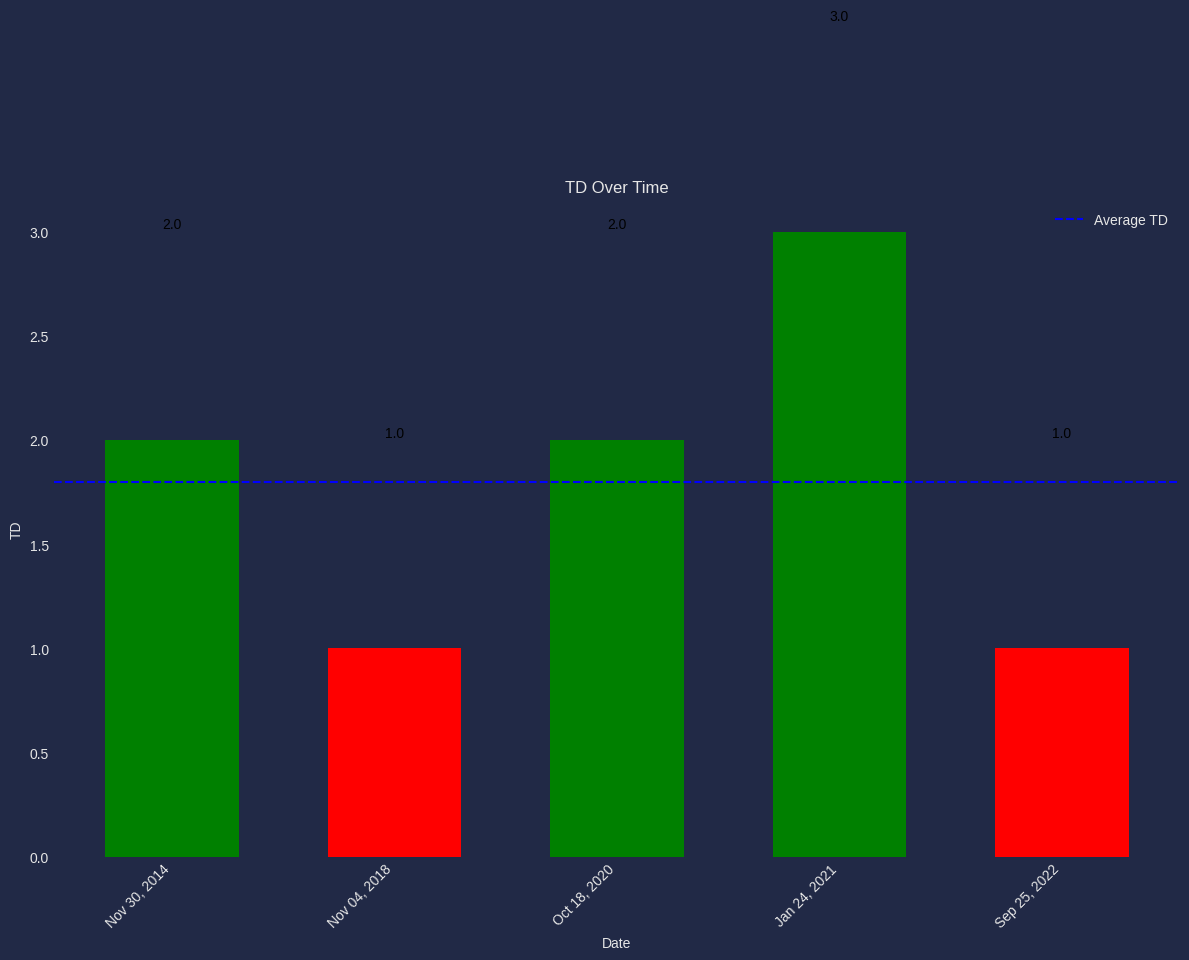

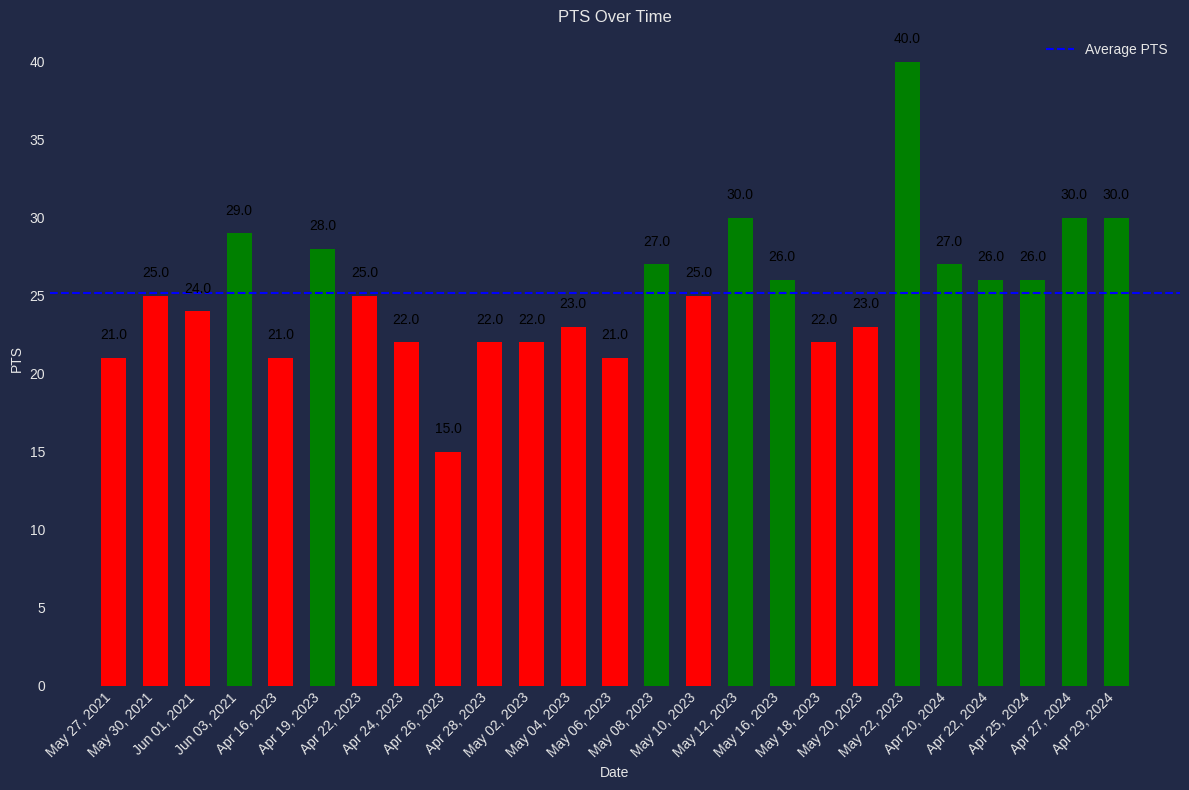

In [4]:
#BAR CHART
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import requests
from PIL import Image
from io import BytesIO
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.pyplot as plt


def get_team_logo(team_abbr):
    url = f"https://a.espncdn.com/i/teamlogos/nba/500/{team_abbr}.png"
    response = requests.get(url)
    if response.status_code == 200:
        img = Image.open(BytesIO(response.content))
        return img
    else:
        print(f"Error fetching logo for {team_abbr}: {response.status_code}")
        return None

def plot_sports_stats(data, parameter):
    plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

    # Extract header and find the index of the specified parameter
    header = data[0]
    index_to_extract = header.index(parameter)

    # Extracting dates, the specified parameter's values, and team abbreviations
    dates = [datetime.strptime(game[header.index('DATE')], '%m/%d/%Y') for game in data[1:] if game[header.index('DATE')]]
    values = [float(game[index_to_extract]) for game in data[1:] if game[index_to_extract]]
    team_abbrs = [game[header.index('TM')] for game in data[1:] if game[header.index('TM')]]

    # Sorting dates, values, and team abbreviations based on dates
    sorted_dates, sorted_values, sorted_team_abbrs = zip(*sorted(zip(dates, values, team_abbrs)))

    x_values = list(range(len(sorted_dates)))

    # Calculate the mean of the values
    mean_value = np.mean(sorted_values)

    # Plotting the bar chart
    plt.figure(figsize=(12, 8))

    colors = ['green' if value >= mean_value else 'red' for value in sorted_values]

    bars = plt.bar(x_values, sorted_values, width=0.6, color=colors)
    plt.axhline(y=mean_value, color='blue', linestyle='--', label=f'Average {parameter}')

    plt.xlabel('Date')
    plt.ylabel(parameter)
    plt.title(f'{parameter} Over Time')
    plt.xticks(x_values, [date.strftime('%b %d, %Y') for date in sorted_dates], rotation=45, ha='right')
    plt.legend()
    plt.grid(False)
    plt.tight_layout()

    # Adding data labels and team logos on top of each bar
    for i, bar in enumerate(bars):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, yval, ha='center', va='bottom', fontsize=10, color='black')

        # Add the team logo to each bar (optional, if applicable and logos are available)
        # team_logo = get_team_logo(sorted_team_abbrs[i])
        # if team_logo:
        #     imagebox = OffsetImage(team_logo, zoom=0.05)
        #     imagebox.image.axes = plt.gca()

        #     ab = AnnotationBbox(imagebox, (bar.get_x() + bar.get_width() / 2, yval - 2),  # Adjust the position to be slightly below the number
        #                         frameon=False, box_alignment=(0.5, 0))
        #     plt.gca().add_artist(ab)

    plt.show()

# Example usage:
data = [
    ['', '', 'NAME', 'DATE', 'TM', '', 'OPP', 'CMP', 'ATT', 'PCT', 'YDS', 'AVG', 'TD', 'INT', 'RATE', 'TD%', 'INT%', 'SCK', 'SCKY'],
    ['1', '', 'Tom BradyT. Brady', '11/30/2014', 'NE', '@', 'GB', '22', '35', '62.9', '245', '7.0', '2', '0', '102.7', '5.7', '0.0', '1', '9'],
    ['2', '', 'Tom BradyT. Brady', '11/4/2018', 'NE', 'vs', 'GB', '22', '35', '62.9', '294', '8.4', '1', '0', '99.0', '2.9', '0.0', '2', '21'],
    ['3', '', 'Tom BradyT. Brady', '10/18/2020', 'TB', 'vs', 'GB', '17', '27', '63.0', '166', '6.1', '2', '0', '104.9', '7.4', '0.0', '0', '0'],
    ['4', '', 'Tom BradyT. Brady', '1/24/2021', 'TB', '@', 'GB', '20', '36', '55.6', '280', '7.8', '3', '3', '73.8', '8.3', '8.3', '1', '5'],
    ['5', '', 'Tom BradyT. Brady', '9/25/2022', 'TB', 'vs', 'GB', '31', '42', '73.8', '271', '6.5', '1', '0', '98.4', '2.4', '0.0', '3', '20'],
    ['', '', 'Average', '', '', '', '', '22.4', '35.0', '64.0', '251.2', '7.2', '1.8', '0.6', '95.3', '5.1', '1.7', '1.4', '11.0']
]

plot_sports_stats(data, 'TD')

lebron_james_career = geturl("nba", "lebron-james", "", "playoff-game-log")
lj = scrape_statmuse(lebron_james_career)
v = clean_nba_data(lj)
plot_sports_stats(v, 'PTS')


In [44]:
#GUI
import ipywidgets as widgets
from IPython.display import display

# Dropdown for league selection
league_dropdown = widgets.Dropdown(
    options=['NBA', 'NFL'],
    value='NBA',
    description='League:',
    disabled=False,
)

# Text input for player name
player_name_text = widgets.Text(
    value='',
    placeholder='Enter player name',
    description='Player Name:',
    disabled=False
)

# Text input for team name
team_name_text = widgets.Text(
    value='',
    placeholder='Enter team name',
    description='Team Name:',
    disabled=False
)

# Dropdown for time duration
time_duration_dropdown = widgets.Dropdown(
    options=['Last 5 Regular Games', 'Playoff Game Log'],
    value='Last 5 Regular Games',
    description='Time Duration:',
    disabled=False,
)

# Dropdown for statistic (dynamically updated based on league)
statistic_dropdown = widgets.Dropdown(
    options=['MIN', 'PTS', 'REB', 'AST', 'STL', 'BLK', 'FGM', 'FGA', '3PM', '3PA', 'FTM', 'FTA', 'OREB', 'DREB', 'TOV', 'PF', 'PTS + REB', 'PTS + AST', 'PTS + REB + AST', 'BLK + STL', 'REB + AST'],  # Initial options for NBA
    value='PTS',
    description='Statistic:',
    disabled=False,
)

# Function to update statistic options based on league
def update_statistic_options(change):
    if change['new'] == 'NBA':
        statistic_dropdown.options = ['MIN', 'PTS', 'REB', 'AST', 'STL', 'BLK', 'FGM', 'FGA', '3PM', '3PA', 'FTM', 'FTA', 'OREB', 'DREB', 'TOV', 'PF', 'PTS + REB', 'PTS + AST', 'PTS + REB + AST', 'BLK + STL', 'REB + AST']
    elif change['new'] == 'NFL':
        statistic_dropdown.options = ['TD', 'YDS', 'INT']

league_dropdown.observe(update_statistic_options, names='value')

# Button to trigger data processing and plotting
button = widgets.Button(
    description='Generate Plot',
    disabled=False,
    button_style='info',
    tooltip='Click to generate plot',
)

# Output widget to display results
output = widgets.Output()

# Function to handle button click
def on_button_clicked(b):
    with output:
        league = league_dropdown.value
        player_name = player_name_text.value.replace(" ", "-").lower()  # Format player name for URL
        team = team_name_text.value.lower()
        time_duration = time_duration_dropdown.value.replace(" ", "-").lower()  # Format time duration for URL
        statistic = statistic_dropdown.value

        url = geturl(league.lower(), player_name, team, time_duration)
        data = scrape_statmuse(url)

        if league == 'NBA':
            cleaned_data = clean_nba_data(data)
        # Add elif blocks for other leagues and their cleaning functions

        plot_sports_stats(cleaned_data, statistic)

button.on_click(on_button_clicked)

# Display the GUI elements
display(league_dropdown, player_name_text, team_name_text, time_duration_dropdown, statistic_dropdown, button, output)

Dropdown(description='League:', options=('NBA', 'NFL'), value='NBA')

Text(value='', description='Player Name:', placeholder='Enter player name')

Text(value='', description='Team Name:', placeholder='Enter team name')

Dropdown(description='Time Duration:', options=('Last 5 Regular Games', 'Playoff Game Log'), value='Last 5 Reg…

Dropdown(description='Statistic:', index=1, options=('MIN', 'PTS', 'REB', 'AST', 'STL', 'BLK', 'FGM', 'FGA', '…

Button(button_style='info', description='Generate Plot', style=ButtonStyle(), tooltip='Click to generate plot'…

Output()

No table found on the page.


IndexError: list index out of range

In [54]:
#RANDOM FONTS
import matplotlib.font_manager
print([f.name for f in matplotlib.font_manager.fontManager.ttflist])


['cmb10', 'cmss10', 'DejaVu Sans Display', 'cmex10', 'DejaVu Serif', 'DejaVu Sans', 'DejaVu Serif', 'STIXNonUnicode', 'STIXNonUnicode', 'DejaVu Sans Mono', 'STIXSizeOneSym', 'STIXGeneral', 'cmr10', 'DejaVu Serif', 'STIXNonUnicode', 'STIXSizeTwoSym', 'DejaVu Sans', 'STIXGeneral', 'STIXSizeThreeSym', 'STIXSizeTwoSym', 'STIXNonUnicode', 'DejaVu Serif Display', 'DejaVu Sans', 'STIXGeneral', 'STIXSizeFourSym', 'DejaVu Sans', 'DejaVu Sans Mono', 'cmmi10', 'STIXGeneral', 'cmtt10', 'cmsy10', 'STIXSizeFourSym', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Serif', 'STIXSizeFiveSym', 'STIXSizeOneSym', 'STIXSizeThreeSym', 'Liberation Sans Narrow', 'Liberation Sans Narrow', 'Liberation Mono', 'Liberation Sans', 'Liberation Sans Narrow', 'Liberation Serif', 'Liberation Sans', 'Liberation Mono', 'Liberation Sans', 'Liberation Serif', 'Liberation Mono', 'Liberation Serif', 'Liberation Sans', 'Liberation Mono', 'Humor Sans', 'Liberation Sans Narrow', 'Liberation Serif']
